# Looi Kah Fung_Assignment 1_P-COM0049/22

CRISP-DM Methodology 
#Business understanding
The dataset comes from BMJ Journals, BMJ Open Gastroenterology. The dataset consists of 450 observations and 27 attributes. The background of the study Northern England has been experiencing a persistent rise in the number of primary liver cancers, largely driven by an increasing incidence of hepatocellular carcinoma (HCC) secondary to alcohol-related liver disease and non-alcoholic fatty liver disease. Here we review the effect of the COVID-19 pandemic on primary liver cancer services and patients in our region.
Objective To assess the impact of the COVID-19 pandemic on patients with newly diagnosed liver cancer in our region.

In [1]:
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 

# Data Understanding 
Cancer: Cancer flag [Y/N]
Year: Categorical [Prepandemic (March 2019–February 2020)/Postpandemic(March 2020–February 2021)]
Month: Month of the year 1-12
Bleed: Spontaneous tumour haemorrhage [Y/N]
Mode Presentation: Surveillance, Incidental, or Symptomatic
Age: Age of the patitent
Gender: Male or Female [M/F]
Etiology: manner of causation of a disease or condition. Either "No established CLD" (chronic liver disease), "ARLD" (alcohol-related liver disease), "NAFLD" (non-alcoholic fatty liver disease), "HCV" (hepatitis C virus), "HH" (hereditary haemochromatosis), "PBC/AIH" (primary biliary cholangitis/autoimmune hepatitis), "HBV" (hepatitis B virus), or "Other".
Cirrhosis: Underlying liver disease [Y/N]
Size: Tumour diameter in mm
HCC TNM Stage: Hepatocellular carcinoma Tumour node metastasis Stage ("I", "II", "IIIA+IIIB", "IV")
HCC BCLC Stage: Hepatocellular carcinoma Barcelona Clinic for Liver Cancer Stage ("0", "A", "B", "C", "D")
ICC TNM Stage: Intrahepatic cholangiocarcinoma Tumour node metastasis Stage ("I", "II", "III", "IV")
Treatment grps: First-line treatment received ["OLTx" (orthotopic liver transplantation), "Resection", "Ablation", "TACE"" (transarterial chemoembolisation), "SIRT" (selective internal radiation therapy), "Medical", "Supportive care"]
Survival from MDM: Survival from Multidisciplinary meeting
Alive Dead: "Alive", "Dead"
Type of incidental finding: ("Primary care-routine", "Secondary care-routine", "Primary care-acute", "Secondary care-acute")
Surveillance programme: Patient in a formal surveillance programme ("Y", "N")
Surveillance effectiveness: Surveillance adherence over previous year ("Consistent", "Inconsistent", "Missed")
Mode of surveillance detection: Mode of incident surveillance test ["US" (ultrasound), "AFP alone" (alpha-fetoprotein alone), "CT/MRI"]
Time diagnosis 1st Tx:
Date incident surveillance scan: ("Y", "N")
PS: Performance status [0, 1, 2, 3, 4]
Time MDM 1st treatment: Time to Multidisciplinary meeting 1st treatment
Time decision to treat 1st treatment: Time decision to treat 1st treatment
Prev known cirrhosis: ["Y", "N"]
Months from last surveillance: Months from last surveillance

https://www.kaggle.com/datasets/fedesoriano/covid19-effect-on-liver-cancer-prediction-dataset

In [2]:
#CP-1252 is an 8-bit character encoding based on ASCII (identical up to code point 127). This is the default codepage for graphical applications under Windows.
df= pd.read_csv("covid-liver.csv",encoding='cp1252')

In [3]:
#print the 1st 5 rows 
df.head(5)

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,Y,Prepandemic,1,N,Surveillance,68,M,NAFLD,Y,22.0,...,Y,Consistent,US,0.47,NaN,0.0,0.7,NaN,Y,7.333333
1,Y,Prepandemic,1,N,Surveillance,70,M,ARLD,Y,40.0,...,Y,Consistent,US,NaN,NaN,2.0,NaN,NaN,Y,4.033333
2,Y,Prepandemic,1,N,Surveillance,64,M,ARLD,Y,52.0,...,Y,Consistent,US,NaN,NaN,0.0,NaN,NaN,Y,5.900000
3,Y,Prepandemic,1,N,Incidental,73,M,ARLD,Y,80.0,...,N,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Y,NaN
4,Y,Prepandemic,1,N,Incidental,66,F,ARLD,Y,60.0,...,N,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Y,NaN


In [4]:
df.describe()

,Month,Age,Size,Survival_fromMDM,Time_diagnosis_1st_Tx,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Months_from_last_surveillance
count,450.000000,450.000000,400.000000,450.000000,158.000000,448.000000,162.000000,107.000000,112.000000
mean,6.757778,70.371111,53.355000,12.696622,-6.570380,1.225446,2.385988,1.500841,10.649970
std,3.449476,10.572586,40.283257,9.703300,114.312876,1.030008,2.103355,1.492801,12.262525
min,1.000000,27.000000,10.000000,-0.030000,-1434.070000,0.000000,-0.870000,-0.870000,0.330000
25%,4.000000,65.000000,24.000000,4.032500,1.207500,0.000000,1.185000,0.715000,5.566667
50%,7.000000,72.000000,40.000000,10.785000,1.915000,1.000000,1.800000,1.370000,6.300000
75%,10.000000,78.000000,70.500000,21.282500,3.160000,2.000000,2.722500,1.715000,10.600000
max,12.000000,96.000000,220.000000,32.770000,13.570000,4.000000,15.000000,11.900000,82.433333


In [5]:
df.nunique()

Cancer                                  2
Year                                    2
Month                                  12
Bleed                                   2
Mode_Presentation                       3
Age                                    54
Gender                                  2
Etiology                                8
Cirrhosis                               2
Size                                   94
HCC_TNM_Stage                           4
HCC_BCLC_Stage                          5
ICC_TNM_Stage                           4
Treatment_grps                          7
Survival_fromMDM                      307
Alive_Dead                              2
Type_of_incidental_finding              4
Surveillance_programme                  2
Surveillance_effectiveness              3
Mode_of_surveillance_detection          3
Time_diagnosis_1st_Tx                  93
Date_incident_surveillance_scan         2
PS                                      5
Time_MDM_1st_treatment            

In [6]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport

     -------------------------------------- 324.4/324.4 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 345.9/345.9 kB 1.1 MB/s eta 0:00:00
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 663.4/663.4 kB 1.5 MB/s eta 0:00:00
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
     ---------------------------------------- 2.1/2.1 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.4 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
     ---------------------------------------- 40.1/40.1 MB 5.0 MB/s eta 0:00:00
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=5b3f813542f6b6f03353b8e95ad985b2fa8358e1bde8d5e

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\looi\\AppData\\Local\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pandas_profiling'

In [7]:
ProfileReport(df, title="Pandas Profiling Report")

NameError: name 'ProfileReport' is not defined

In [8]:
#retrieve the preliminary info of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancer                              450 non-null    object 
 1   Year                                450 non-null    object 
 2   Month                               450 non-null    int64  
 3   Bleed                               310 non-null    object 
 4   Mode_Presentation                   450 non-null    object 
 5   Age                                 450 non-null    int64  
 6   Gender                              450 non-null    object 
 7   Etiology                            311 non-null    object 
 8   Cirrhosis                           311 non-null    object 
 9   Size                                400 non-null    float64
 10  HCC_TNM_Stage                       311 non-null    object 
 11  HCC_BCLC_Stage                      311 non-n

In [9]:
#Examine the missing values, there're null values across categorical and numerical features  
df.isnull().sum()

Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treatment            

In [10]:
#Remove those columns that contain the proportion of missing values more than 50%. 
pct_null = df.isnull().sum()/len(df)
missing_features = pct_null[pct_null>0.50].index
df.drop(missing_features, axis=1, inplace=True)

C:\Users\looi\AppData\Local\Temp\ipykernel_61224\3146166504.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='winter')


<Axes: >

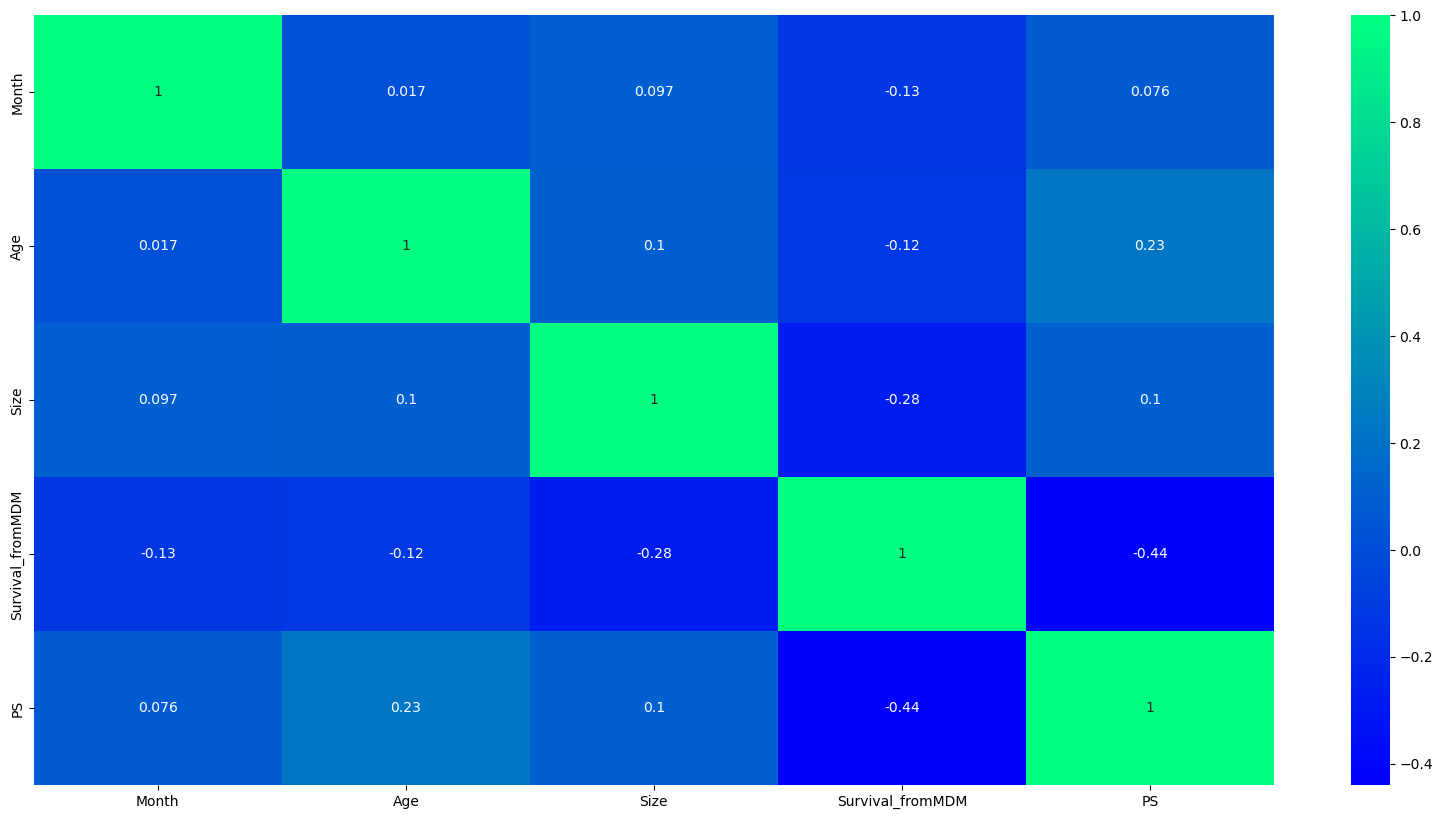

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlations using heat map plot
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='winter')

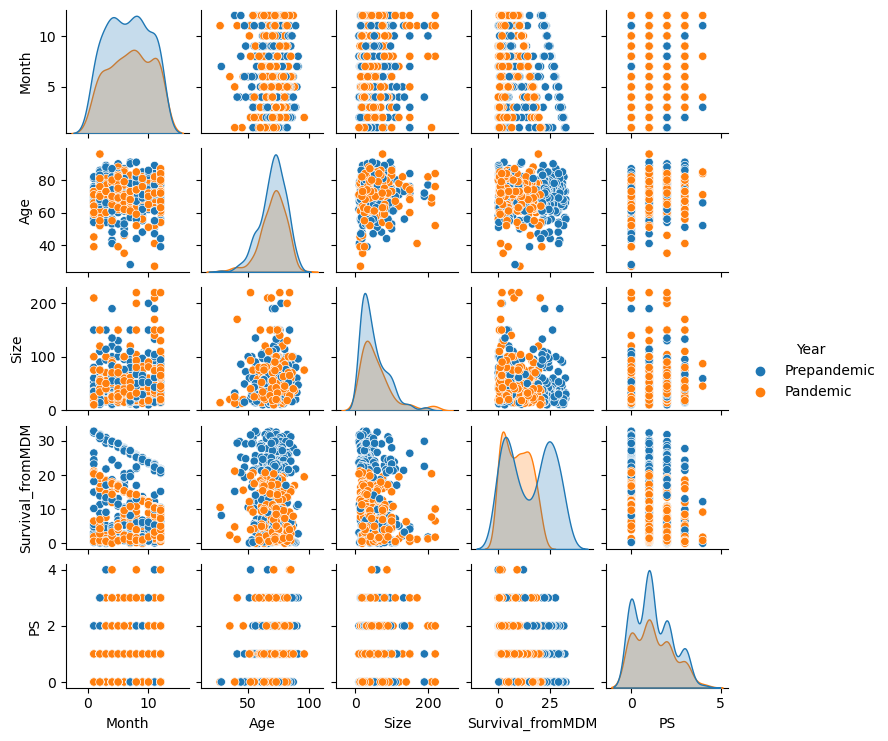

In [12]:
sns.pairplot(df,  height=1.5, hue='Year')

In [13]:
#Feature has been reduced to 15 after removing features that are having null-value more than 50%.Loss of statistical power.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancer                  450 non-null    object 
 1   Year                    450 non-null    object 
 2   Month                   450 non-null    int64  
 3   Bleed                   310 non-null    object 
 4   Mode_Presentation       450 non-null    object 
 5   Age                     450 non-null    int64  
 6   Gender                  450 non-null    object 
 7   Etiology                311 non-null    object 
 8   Cirrhosis               311 non-null    object 
 9   Size                    400 non-null    float64
 10  HCC_TNM_Stage           311 non-null    object 
 11  HCC_BCLC_Stage          311 non-null    object 
 12  Treatment_grps          448 non-null    object 
 13  Survival_fromMDM        450 non-null    float64
 14  Alive_Dead              450 non-null    ob

#Handling missing values - categorical features and numerical features
https://towardsdatascience.com/handling-missing-data-like-a-pro-part-2-imputation-methods-eabbf10b9ce4
https://jamesrledoux.com/code/imputation

https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893

In [14]:
#Examine the missing values, there're null values across categorical and numerical features  2.0
df.isnull().sum()

Cancer                      0
Year                        0
Month                       0
Bleed                     140
Mode_Presentation           0
Age                         0
Gender                      0
Etiology                  139
Cirrhosis                 139
Size                       50
HCC_TNM_Stage             139
HCC_BCLC_Stage            139
Treatment_grps              2
Survival_fromMDM            0
Alive_Dead                  0
Surveillance_programme    139
PS                          2
Prev_known_cirrhosis        5
dtype: int64

In [15]:
Categorical_var =['Bleed','Etiology','Cirrhosis','Surveillance_programme','Prev_known_cirrhosis','HCC_TNM_Stage','HCC_BCLC_Stage','Treatment_grps']

In [16]:
#Fillna for numerical features
df['Size']=df['Size'].fillna(df['Size'].mean())

In [17]:
df['PS'].fillna(method='ffill',inplace=True)

In [18]:
# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(df,ColName):
    #1. add new column and replace if category is null then 1 else 0
    df[ColName] =   np.where(df[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    Mode_Category = df[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual variable
    df[ColName].fillna(Mode_Category,inplace=True)
# Call function to impute NAN values and add new importance feature
for Columns in Categorical_var:
    impute_nan_add_vairable(df,Columns)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancer                  450 non-null    object 
 1   Year                    450 non-null    object 
 2   Month                   450 non-null    int64  
 3   Bleed                   450 non-null    int32  
 4   Mode_Presentation       450 non-null    object 
 5   Age                     450 non-null    int64  
 6   Gender                  450 non-null    object 
 7   Etiology                450 non-null    int32  
 8   Cirrhosis               450 non-null    int32  
 9   Size                    450 non-null    float64
 10  HCC_TNM_Stage           450 non-null    int32  
 11  HCC_BCLC_Stage          450 non-null    int32  
 12  Treatment_grps          450 non-null    int32  
 13  Survival_fromMDM        450 non-null    float64
 14  Alive_Dead              450 non-null    ob

In [20]:
df.isnull().sum()

Cancer                    0
Year                      0
Month                     0
Bleed                     0
Mode_Presentation         0
Age                       0
Gender                    0
Etiology                  0
Cirrhosis                 0
Size                      0
HCC_TNM_Stage             0
HCC_BCLC_Stage            0
Treatment_grps            0
Survival_fromMDM          0
Alive_Dead                0
Surveillance_programme    0
PS                        0
Prev_known_cirrhosis      0
dtype: int64

In [21]:
df.nunique()

Cancer                      2
Year                        2
Month                      12
Bleed                       2
Mode_Presentation           3
Age                        54
Gender                      2
Etiology                    2
Cirrhosis                   2
Size                       95
HCC_TNM_Stage               2
HCC_BCLC_Stage              2
Treatment_grps              2
Survival_fromMDM          307
Alive_Dead                  2
Surveillance_programme      2
PS                          5
Prev_known_cirrhosis        2
dtype: int64

In [22]:
#count observations based on attribute 
#Mildly imbalanced dataset 
df['PS'].value_counts()

1.0    163
0.0    126
2.0     99
3.0     57
4.0      5
Name: PS, dtype: int64

<Axes: xlabel='PS', ylabel='count'>

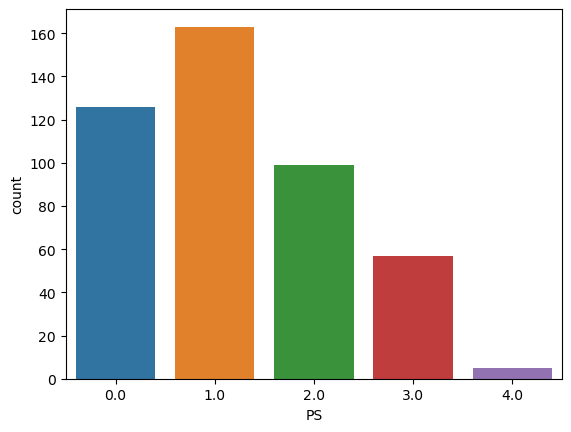

In [23]:
import seaborn as sns
#count rows of each classes
sns.countplot(x="PS", data=df)

datasets with low imbalance (IR is between 1.5 and 3)
datasets with medium imbalance (IR is between 3 and 9)
datasets with high imbalance (IR is higher than 9)]
https://medium.com/perspectivesondatascience/insights-into-imbalanced-datasets-65acedfde28d

In [24]:
#one-hot encoding
df3 = pd.get_dummies(df, dtype=int)
#showing new head
df3.head()

,Month,Bleed,Age,Etiology,Cirrhosis,Size,HCC_TNM_Stage,HCC_BCLC_Stage,Treatment_grps,Survival_fromMDM,...,Cancer_Y,Year_Pandemic,Year_Prepandemic,Mode_Presentation_Incidental,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic,Gender_F,Gender_M,Alive_Dead_Alive,Alive_Dead_Dead
0,1,0,68,0,0,22.0,0,0,0,32.73,...,1,0,1,0,1,0,0,1,1,0
1,1,0,70,0,0,40.0,0,0,0,3.03,...,1,0,1,0,1,0,0,1,0,1
2,1,0,64,0,0,52.0,0,0,0,14.97,...,1,0,1,0,1,0,0,1,0,1
3,1,0,73,0,0,80.0,0,0,0,1.40,...,1,0,1,1,0,0,0,1,0,1
4,1,0,66,0,0,60.0,0,0,0,32.50,...,1,0,1,1,0,0,1,0,1,0


In [25]:
cat=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)

In [26]:
cat

['Cancer', 'Year', 'Mode_Presentation', 'Gender', 'Alive_Dead']

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Month                           450 non-null    int64  
 1   Bleed                           450 non-null    int32  
 2   Age                             450 non-null    int64  
 3   Etiology                        450 non-null    int32  
 4   Cirrhosis                       450 non-null    int32  
 5   Size                            450 non-null    float64
 6   HCC_TNM_Stage                   450 non-null    int32  
 7   HCC_BCLC_Stage                  450 non-null    int32  
 8   Treatment_grps                  450 non-null    int32  
 9   Survival_fromMDM                450 non-null    float64
 10  Surveillance_programme          450 non-null    int32  
 11  PS                              450 non-null    float64
 12  Prev_known_cirrhosis            450 

Modelling 

In [28]:
#Training dataset 
#select all columns except PS 
X= df3.drop("PS", axis=1)
#set target categorical data label (PS)
y= df3["PS"]

In [34]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [35]:
#train-test split - 70/30 ratio
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) #data imbalance, add a new argument stratify = y 

In [36]:
print('-------- x axis test ----------')
print(X_test)
print('-------- x axis train ---------')
print(X_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
     Month  Bleed  Age  Etiology  Cirrhosis   Size  HCC_TNM_Stage  \
407      5      1   74         1          1   19.0              1   
444     12      1   73         1          1   20.0              1   
117      8      0   91         0          0   47.0              0   
30       3      0   63         0          0   44.0              0   
415      6      1   79         1          1   40.0              1   
..     ...    ...  ...       ...        ...    ...            ...   
29       3      0   72         0          0   24.0              0   
298     11      0   52         0          0  220.0              0   
285     11      0   70         0          0   36.0              0   
26       2      0   78         0          0   28.0              0   
7        1      0   67         0          0   45.0              0   

     HCC_BCLC_Stage  Treatment_grps  Survival_fromMDM  ...  Cancer_Y  \
407               1               0             17.20  ...         

Extreme Gradient Boost 

In [32]:
!pip install xgboost

In [37]:
# import XGBClassifier
from xgboost import XGBClassifier
import xgboost as xgb
params = {"objective":"multi:softmax",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'num_class':5}

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [38]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [39]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.4296


In [40]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb_clf, X = X_train, y = y_train, cv = 8)
accuracies.mean()
accuracies.std()

C:\Users\looi\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=8.
  warnings.warn(


0.03476345349475961

In [41]:
from xgboost import cv

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [42]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.641840,0.006329,0.633132,0.012000
1,0.663463,0.005578,0.636493,0.019929
2,0.671433,0.009231,0.633802,0.018792
3,0.685717,0.001985,0.650669,0.027448
4,0.692363,0.002904,0.662385,0.034588
5,0.702786,0.008875,0.657953,0.031378
6,0.706928,0.009528,0.659343,0.033773
7,0.714955,0.015716,0.657547,0.034076
8,0.716032,0.018249,0.659289,0.031610
9,0.718525,0.020444,0.659100,0.033827


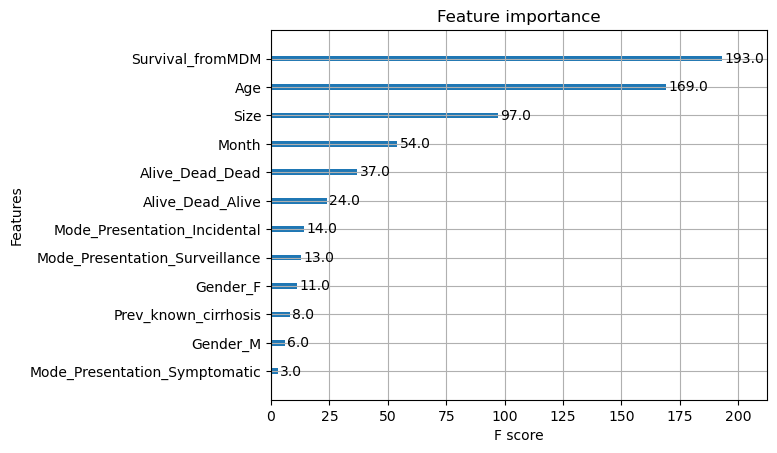

<Figure size 1600x1200 with 0 Axes>

In [43]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

<Axes: >

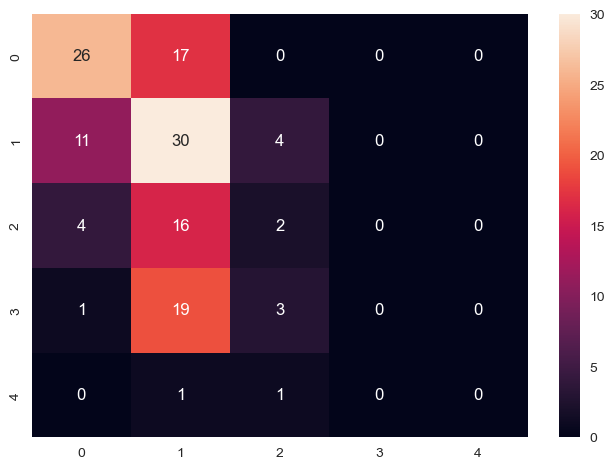

In [49]:
from sklearn.metrics import confusion_matrix
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
sns.heatmap(cm_df, annot=True)

In [51]:
# import classification report metrices
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.60      0.61        43
         1.0       0.36      0.67      0.47        45
         2.0       0.20      0.09      0.13        22
         3.0       0.00      0.00      0.00        23
         4.0       0.00      0.00      0.00         2

    accuracy                           0.43       135
   macro avg       0.24      0.27      0.24       135
weighted avg       0.35      0.43      0.37       135



C:\Users\looi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\looi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\looi\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [47]:
from yellowbrick.classifier import ROCAUC

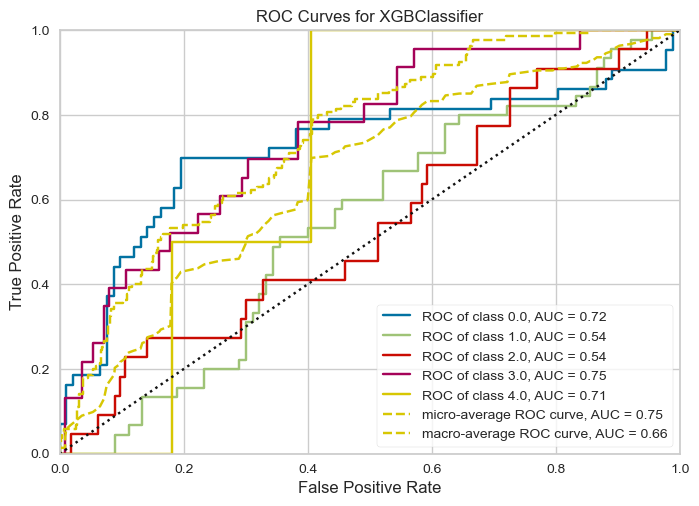

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
# Instaniate the classification model and visualizer
params = {"objective":"multi:softmax",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'num_class':5}
model = xgb.XGBClassifier(**params)
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure